## Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

### Load the data

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv('test.csv')
var = pd.read_csv('VariableDefinitions.csv')
sample = pd.read_csv('SampleSubmission.csv')

### Inspect the data

In [3]:
#training data set
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
#testing data set
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [5]:
#check the number of rows and colums in the training dataset

train.shape

(23524, 13)

In [6]:
#check the number of rows and colums in the testing dataset

test.shape

(10086, 12)

In [7]:
#check for missing values in the dataset

train.isna().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [8]:
#check for missing values in the test dataset

test.isna().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [9]:
#check for the unique values in each variable

train.nunique()

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
household_size              20
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

In [10]:
#check for the unique values in each variable

test.nunique()

country                      4
year                         3
uniqueid                  7313
location_type                2
cellphone_access             2
household_size              18
age_of_respondent           83
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

In [11]:
#inspect the training data coulums

train.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [12]:
#inspect the training data coulums

test.columns

Index(['country', 'year', 'uniqueid', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

   ### Exploratory data analysis

In [13]:
#check for the mean 

train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [14]:
#Using pandas_profiling library generate a better report
train_profile = ProfileReport(train, title="Pandas Profiling Report of train dataset")
test_profile = ProfileReport(test, title="Pandas Profiling Report of test dataset")

In [15]:
train_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
test_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Text(0.5, 1.0, 'relationship between country and household size')

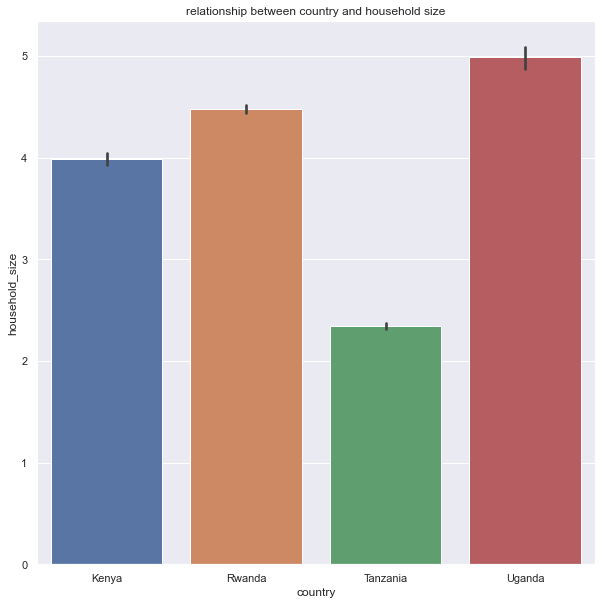

In [17]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(x = 'country',y = 'household_size',data = train)
plt.title('relationship between country and household size')

Text(0.5, 1.0, 'Level of Education')

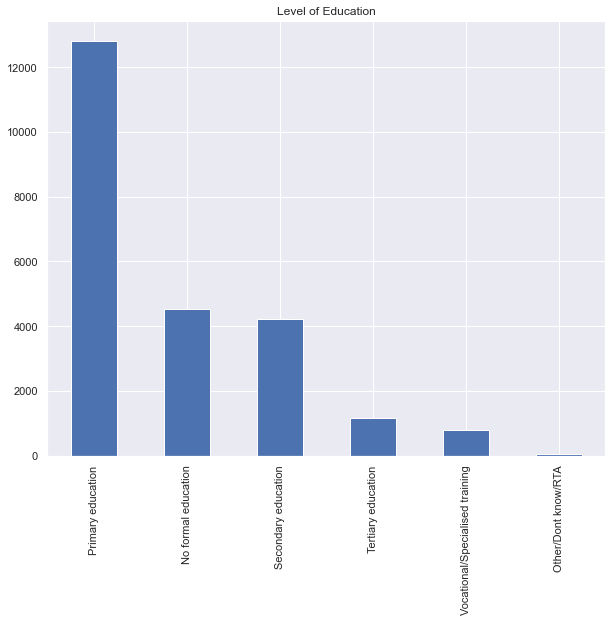

In [18]:
L = train['education_level'].value_counts()[:10]
L.plot(kind = 'bar',figsize=(10,8))
plt.title('Level of Education')

In [19]:
train1= train.drop(['uniqueid'], axis=1, inplace=True)

In [20]:
test1 = test.drop(['uniqueid'], axis=1)

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])

def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    return data

In [23]:
train = preprocessing_data(train)
test1 = preprocessing_data(test1)

In [24]:
train.head()

,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
0,2018,1,0,1,3,24,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2018,0,0,0,5,70,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,2018,1,1,1,5,26,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,2018,0,0,1,5,34,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2018,0,1,0,8,26,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [25]:
train.corr()['bank_account'].sort_values(ascending=False)

bank_account                                       1.000000
job_type_Formally employed Private                 0.249478
education_level_Tertiary education                 0.241958
job_type_Formally employed Government              0.235900
education_level_Vocational/Specialised training    0.232187
cellphone_access                                   0.209669
country_Kenya                                      0.186242
education_level_Secondary education                0.123702
gender_of_respondent                               0.117234
relationship_with_head_Head of Household           0.114506
year                                               0.112318
location_type                                      0.087288
marital_status_Married/Living together             0.086518
job_type_Other Income                              0.025663
age_of_respondent                                  0.019429
education_level_Other/Dont know/RTA                0.019255
job_type_Government Dependent           

In [26]:
test1.head()

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
0,2018,1,1,3,30,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2018,1,1,7,51,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2018,0,0,3,77,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,2018,0,0,6,39,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,2018,1,0,3,16,1,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


#### Separate the training set from testing set

In [34]:
X_train=train.drop(['bank_account'], axis=1)
y_train=train['bank_account']

In [37]:
y_train.value_counts()

0    20212
1     3312
Name: bank_account, dtype: int64

#### Balance the data

In [40]:
from collections import Counter
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('original datasetshape', Counter(y_train))
print('resample dataset shape', Counter(y_smote))

original datasetshape Counter({0: 20212, 1: 3312})
resample dataset shape Counter({1: 20212, 0: 20212})


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier



In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_smote, y_smote)

# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# evaluate the model
rfc_pred = rfc.predict(X_smote)

# Get error rate
print("Error rate of RandomForestClassifier classifier: ", mean_absolute_error(y_smote, rfc_pred))
print(classification_report(y_smote, rfc_pred))

Error rate of RandomForestClassifier classifier:  0.023624579457747874
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     20212
           1       0.98      0.98      0.98     20212

    accuracy                           0.98     40424
   macro avg       0.98      0.98      0.98     40424
weighted avg       0.98      0.98      0.98     40424



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


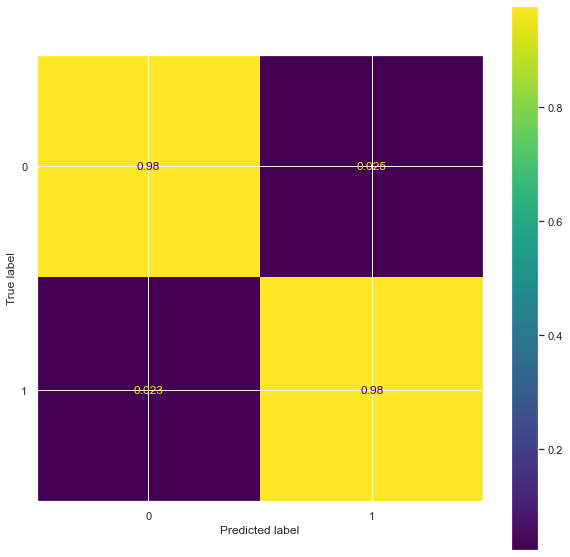

In [47]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc,X_smote, y_smote,normalize='true')

In [48]:
test.bank_account = rfc.predict(test1)

# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
                           "bank_account": test.bank_account})

submission.to_csv('11_submission.csv', index = False)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9328\1640028576.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.bank_account = rfc.predict(test1)
